In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [2]:
dig = load_digits()

In [3]:
dir(dig)

['DESCR', 'data', 'images', 'target', 'target_names']

In [4]:
dig.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

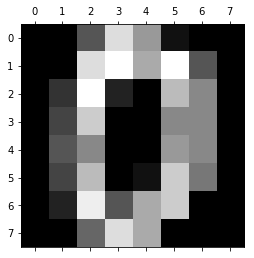

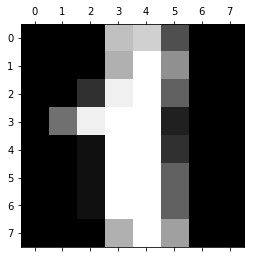

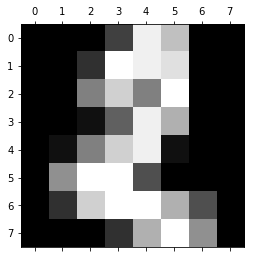

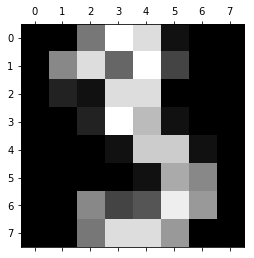

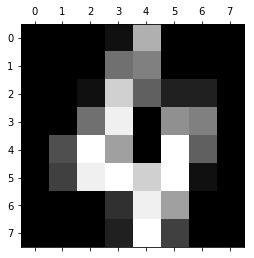

In [5]:
#plot it
plt.gray()
for i in range(5):
    plt.matshow(dig.images[i])

In [6]:
#lets use these images to train your model

In [7]:
dig.target[0:5]

array([0, 1, 2, 3, 4])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(dig.data, dig.target,test_size =.2)

In [9]:
len(x_train)

1437

In [10]:
len(x_test)

360

In [11]:
from sklearn.linear_model import LogisticRegression

In [13]:
model = LogisticRegression()
model.fit(x_train,y_train)

H:\Anaconda_work\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
H:\Anaconda_work\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
model.score(x_test,y_test)

0.9638888888888889

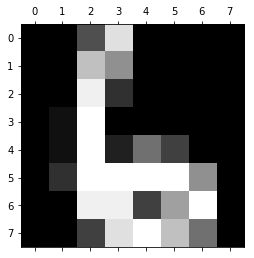

In [15]:
#lets make predictions
plt.matshow(dig.images[67])

In [16]:
dig.target[67]

6

In [17]:
model.predict([dig.data[67]])

array([6])

In [18]:
model.predict(dig.data[0:5])

array([0, 1, 2, 3, 4])

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)

In [20]:
con = confusion_matrix(y_test,y_pred)

In [21]:
con

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 34,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 35,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 35,  2],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 35]], dtype=int64)

Text(69.0, 0.5, 'truth')

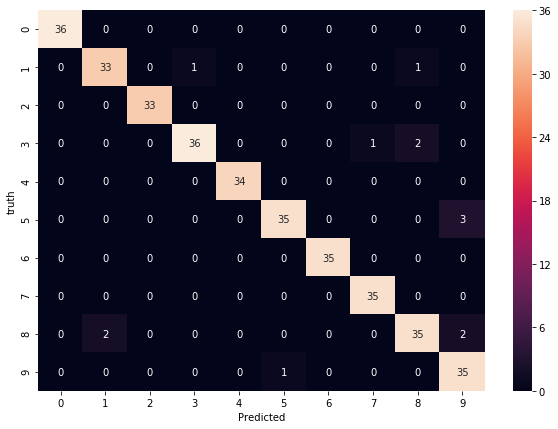

In [23]:
#use seaborn to plot heatmap of the confuion ,matrix
import seaborn as sb
plt.figure(figsize = (10,7))
sb.heatmap(con, annot =True)
plt.xlabel('Predicted')
plt.ylabel('truth')